In [88]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [89]:
# Set style for seaborn
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# Load dataset
file_path = 'spotify-2023.csv'
spotify_data = pd.read_csv(file_path, encoding='ISO-8859-1')

In [90]:
# Initial Data Inspection
print("Dataset Shape:", spotify_data.shape)
print("\nDataset Info:")
spotify_data.info()

# Display first few rows
spotify_data.head()

Dataset Shape: (953, 24)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [91]:
# Step 1: Data Cleaning and Preprocessing
# Convert 'streams' column to numeric by removing commas
spotify_data['streams'] = pd.to_numeric(spotify_data['streams'].str.replace(",", " "), errors='coerce')

# Check for missing values and drop rows with missing critical data (e.g., 'key')
missing_data = spotify_data.isnull().sum()
print("\nMissing Values in each Column:\n", missing_data[missing_data > 0])

spotify_data.dropna(subset=['key'], inplace=True)


Missing Values in each Column:
 streams              1
in_shazam_charts    50
key                 95
dtype: int64


In [92]:
# Step 2: Descriptive Statistics
# Calculate summary statistics for numeric columns
numeric_summary = spotify_data.describe()
print("\nSummary Statistics:\n", numeric_summary)


Summary Statistics:
        artist_count  released_year  released_month  released_day  \
count    858.000000     858.000000      858.000000    858.000000   
mean       1.551282    2018.241259        6.025641     13.724942   
std        0.864335      11.107781        3.569192      9.292416   
min        1.000000    1930.000000        1.000000      1.000000   
25%        1.000000    2020.000000        3.000000      5.000000   
50%        1.000000    2022.000000        5.000000     13.000000   
75%        2.000000    2022.000000        9.000000     22.000000   
max        8.000000    2023.000000       12.000000     31.000000   

       in_spotify_playlists  in_spotify_charts       streams  \
count            858.000000         858.000000  8.570000e+02   
mean            5202.284382          11.945221  5.133554e+08   
std             7939.794527          19.187353  5.714855e+08   
min               31.000000           0.000000  2.762000e+03   
25%              860.250000           0.00000


Streams - Mean: 513355357.38856477, Median: 284908316.0, Standard Deviation: 571485476.7292064


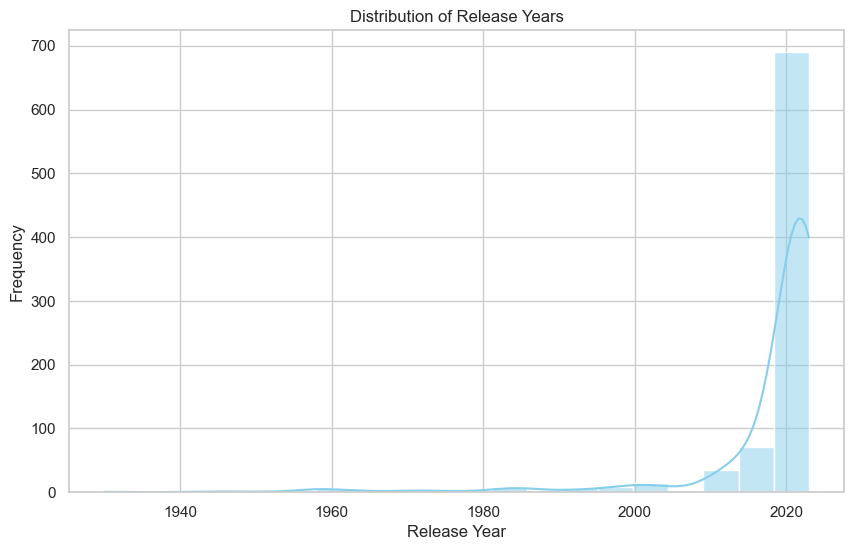

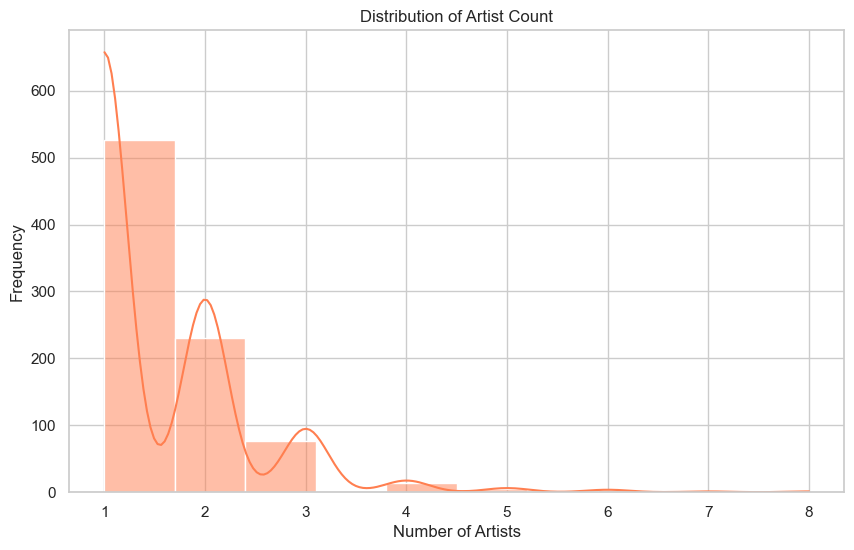

In [93]:
# Mean, Median, and Standard Deviation of Streams
streams_mean = spotify_data['streams'].mean()
streams_median = spotify_data['streams'].median()
streams_std = spotify_data['streams'].std()
print(f"\nStreams - Mean: {streams_mean}, Median: {streams_median}, Standard Deviation: {streams_std}")

# Distribution of released_year and artist_count
plt.figure()
sns.histplot(spotify_data['released_year'], bins=20, kde=True, color='skyblue')
plt.title("Distribution of Release Years")
plt.xlabel("Release Year")
plt.ylabel("Frequency")
plt.show()

plt.figure()
sns.histplot(spotify_data['artist_count'], bins=10, kde=True, color='coral')
plt.title("Distribution of Artist Count")
plt.xlabel("Number of Artists")
plt.ylabel("Frequency")
plt.show()

In [94]:
# Step 3: Top Performers
# Track with highest streams
top_tracks = spotify_data[['track_name', 'streams']].sort_values(by='streams', ascending=False).head(5)
print("\nTop 5 Most Streamed Tracks:\n", top_tracks)


Top 5 Most Streamed Tracks:
                                         track_name       streams
55                                 Blinding Lights  3.703895e+09
179                                   Shape of You  3.562544e+09
86                               Someone You Loved  2.887242e+09
620                                   Dance Monkey  2.864792e+09
41   Sunflower - Spider-Man: Into the Spider-Verse  2.808097e+09


In [95]:
# Top 5 most frequent artists
top_artists = spotify_data['artist(s)_name'].value_counts().head(5)
print("\nTop 5 Most Frequent Artists:\n",  top_artists )


Top 5 Most Frequent Artists:
 Taylor Swift    29
The Weeknd      17
SZA             17
Bad Bunny       16
Harry Styles    13
Name: artist(s)_name, dtype: int64


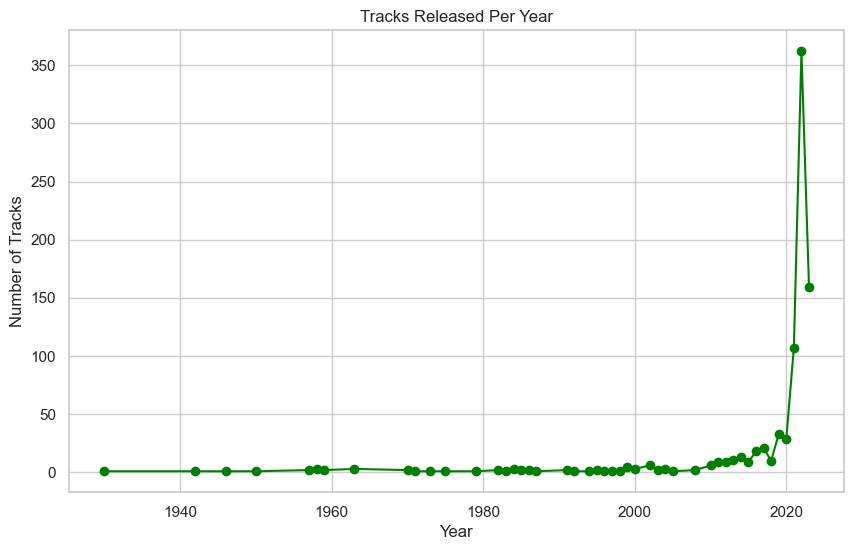

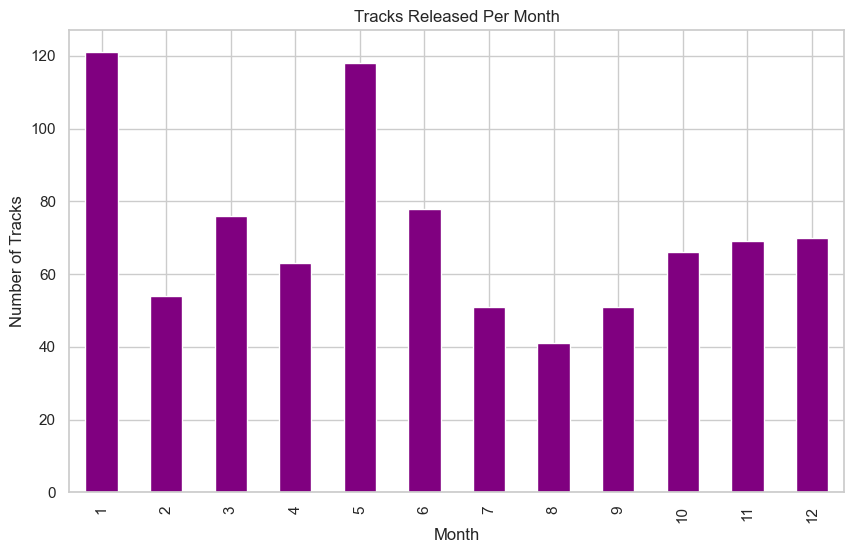

In [96]:
# Step 4: Temporal Trends
# Number of tracks released per year
yearly_release_count = spotify_data['released_year'].value_counts().sort_index()
plt.figure()
yearly_release_count.plot(kind='line', marker='o', color='green')
plt.title("Tracks Released Per Year")
plt.xlabel("Year")
plt.ylabel("Number of Tracks")
plt.show()

# Tracks released per month
monthly_release_count = spotify_data['released_month'].value_counts().sort_index()
plt.figure()
monthly_release_count.plot(kind='bar', color='purple')
plt.title("Tracks Released Per Month")
plt.xlabel("Month")
plt.ylabel("Number of Tracks")
plt.show()

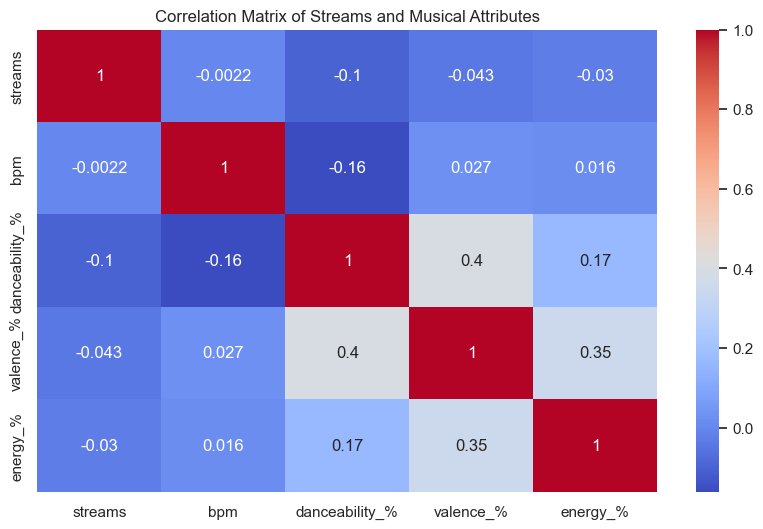

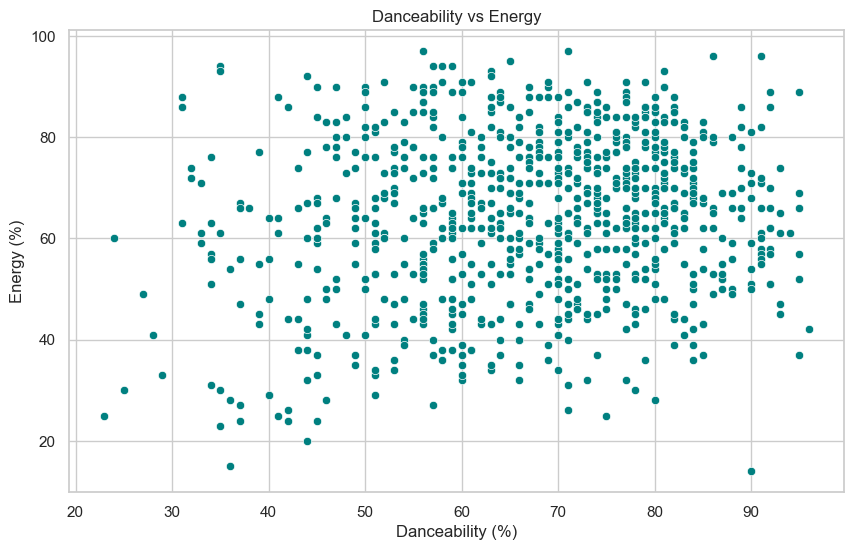

In [97]:
# Step 5: Correlations Between Streams and Music Characteristics
# Heatmap of correlations
correlation_matrix = spotify_data[['streams', 'bpm', 'danceability_%', 'valence_%', 'energy_%']].corr()
plt.figure()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Streams and Musical Attributes")
plt.show()

# Correlation between danceability and energy
plt.figure()
sns.scatterplot(data=spotify_data, x='danceability_%', y='energy_%', color='teal')
plt.title("Danceability vs Energy")
plt.xlabel("Danceability (%)")
plt.ylabel("Energy (%)")
plt.show()

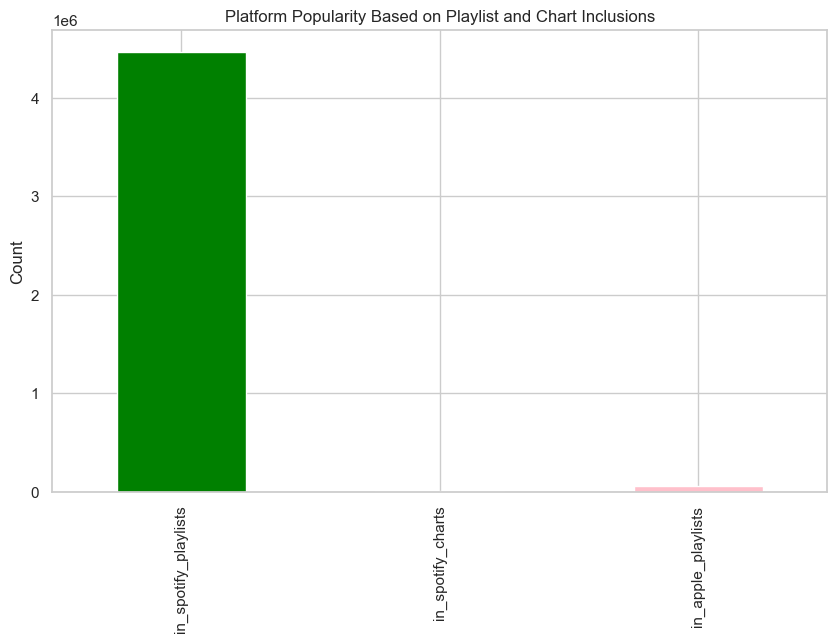

In [98]:
# Step 6: Platform Popularity
# Compare track counts in playlists and charts across platforms
platform_counts = spotify_data[['in_spotify_playlists', 'in_spotify_charts', 'in_apple_playlists']].sum()
platform_counts.plot(kind='bar', color=['green', 'black', 'pink'])
plt.title("Platform Popularity Based on Playlist and Chart Inclusions")
plt.ylabel("Count")
plt.show()

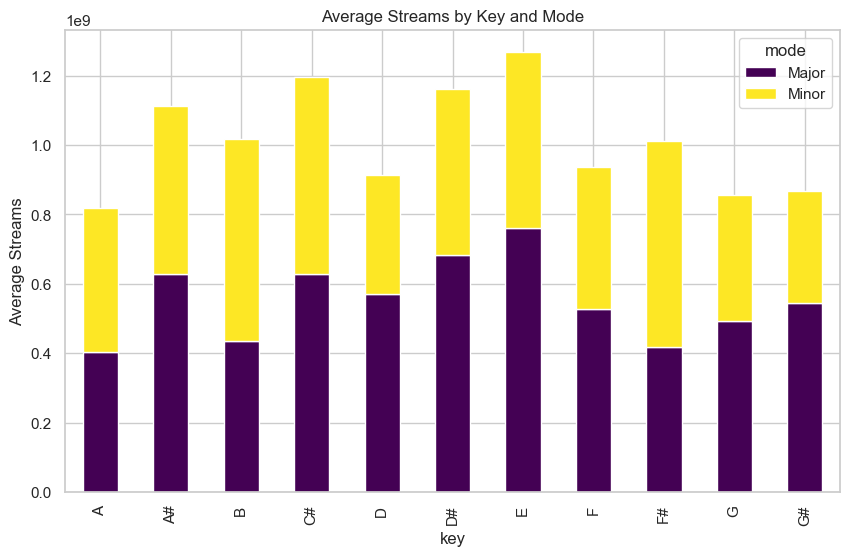


Top Artists by Spotify Playlists Inclusion:
 artist(s)_name
Ed Sheeran      128758
Taylor Swift    114460
The Weeknd       98395
Eminem           87331
Harry Styles     80528
Name: in_spotify_playlists, dtype: int64


In [99]:
# Step 7: Advanced Analysis - Key and Mode
# Analyzing patterns by key and mode
key_mode_streams = spotify_data.groupby(['key', 'mode'])['streams'].mean().unstack()
key_mode_streams.plot(kind='bar', stacked=True, colormap='viridis')
plt.title("Average Streams by Key and Mode")
plt.ylabel("Average Streams")
plt.show()

# Analyzing genre and artist playlist appearances
# Top artists in Spotify playlists
top_spotify_artists = spotify_data.groupby('artist(s)_name')['in_spotify_playlists'].sum().sort_values(ascending=False).head(5)
print("\nTop Artists by Spotify Playlists Inclusion:\n", top_spotify_artists)